In [70]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import random
from scipy.stats.distributions import t
# np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
random_seed = 39
random.seed(random_seed)
np.random.seed(random_seed)

In [73]:
def t_test(arr1, arr2,  alt, alpha = 0.05): # v: 0 - >, 1 - <, 2 - !=
    m1 = arr1.mean()
    m2 = arr2.mean()
    n1 = len(arr1)
    n2 = len(arr2)
    s1 = np.sum((arr1 - m1) ** 2 / (n1-1))
    s2 = np.sum((arr2 - m2) ** 2 / (n2-1))
    Z = (m1 - m2) / (np.sqrt(s1 / n1 + s2 / n2))
    df = (s1 / n1 + s2 / n2) ** 2 / ((s1 / n1) ** 2 / (n1 - 1) + (s2 / n2) ** 2 / (n2 - 1))
    if alt == 0:
        p = 1 - t.cdf(Z, df=df)
        s = "greater"
    elif alt == 1:
        p = t.cdf(Z, df=df)
        s = "less"
    else:
        p = 2 * min(t.cdf(Z, df=df), 1 - t.cdf(Z, df=df))
        s = "two-sided"
    res = sps.ttest_ind(arr1, arr2, equal_var=False, alternative = s)
    print(f"Значение статистики: {round(Z, 3)}, sps: {round(res.statistic, 3)}")
    print(f"p value = {round(p, 3)}, sps p = {round(res.pvalue, 3)}")
    if p < alpha:
        print("Отвергается нулевая гипотеза\n")
    else:
        print("Недостаточно данных\n")
a1 = sps.norm.rvs(1, 2, 100)
a2 = sps.norm.rvs(1.9, 5, 150)
t_test(a1, a2,  0)
t_test(a1, a2,  1)
t_test(a1, a2,  2)

Значение статистики: -2.676, sps: -2.676
p value = 0.996, sps p = 0.996
Недостаточно данных

Значение статистики: -2.676, sps: -2.676
p value = 0.004, sps p = 0.004
Отвергается нулевая гипотеза

Значение статистики: -2.676, sps: -2.676
p value = 0.008, sps p = 0.008
Отвергается нулевая гипотеза



In [81]:
def bootstrap(arr, num_obj, len_obj, alpha = 0.05):
    idx = np.random.randint(0, len(arr), (num_obj, len_obj))
    vb = arr[idx]
    means = np.mean(vb, axis = 1)
    medians = np.median(vb, axis = 1)
    m_per = np.percentile(means, (alpha * 100, (1 - alpha) * 100))
    md_per = np.percentile(medians, (alpha * 100, (1 - alpha) * 100))
    print(f"conf interval mean: {m_per}")
    print(f"conf interval median: {md_per}\n")

arr1 = sps.norm.rvs(1, 2, 1000)
bootstrap(arr1, num_obj = 100, len_obj = 10000, alpha = 0.05)

arr2 = sps.expon.rvs(1, 0.5, 1000)
bootstrap(arr2, num_obj = 100, len_obj = 10000, alpha = 0.05)

arr3 = np.concatenate((sps.norm.rvs(-3, 6, 100),  arr1[:900]))
bootstrap(arr3, num_obj = 100, len_obj = 10000, alpha = 0.05)

conf interval mean: [0.936 1.004]
conf interval median: [0.964 1.056]

conf interval mean: [1.459 1.474]
conf interval median: [1.309 1.328]

conf interval mean: [0.472 0.574]
conf interval median: [0.827 0.939]



In [82]:
def power(x_a, x_b,  loc, scale, test, alpha = 0.05):
    print(f"M1 = {loc[0]}, D1 = {scale[0]}")
    print(f"M2 = {loc[1]}, D2 = {scale[1]}")
    l = []
    for _ in range(1000):
        arr1 = x_a.rvs(loc = loc[0], scale = scale[0], size = 10)
        arr2 = x_b.rvs(loc = loc[1], scale = scale[1], size = 10)
        try:
            p_val = test(arr1, arr2, equal_var=scale[0] == scale[1], alternative = "two-sided").pvalue
            s = "T test"
        except:
            p_val = test(arr1, arr2, alternative = "two-sided").pvalue
            s = "Mannwhitneyu"
        l.append(p_val)
    l = np.array(l)
    pr = len(l[l < alpha]) / len(l) * 100
    print(f"{s}, Мощность = {pr}\n")

for i in "Нормальное распределение:", "\nЛогистическое распределение:":
    print(i)
    x = sps.norm if i == "Нормальное распределение:" else sps.logistic
    for a, b in [([0, 1], [0, 1]), ([0, 1], [100, 1]), ([0, 0], [100, 1]), ([1000, 0], [1000, 1]), ([0, 0], [1, 1])]:
        power(x, x,  loc = a, scale = b, test = sps.ttest_ind)
        power(x, x,  loc = a, scale = b, test = sps.mannwhitneyu)

Нормальное распределение:
M1 = 0, D1 = 0
M2 = 1, D2 = 1
T test, Мощность = 79.10000000000001

M1 = 0, D1 = 0
M2 = 1, D2 = 1
Mannwhitneyu, Мощность = 80.7

M1 = 0, D1 = 100
M2 = 1, D2 = 1
T test, Мощность = 5.1

M1 = 0, D1 = 100
M2 = 1, D2 = 1
Mannwhitneyu, Мощность = 10.4

M1 = 0, D1 = 100
M2 = 0, D2 = 1
T test, Мощность = 4.6

M1 = 0, D1 = 100
M2 = 0, D2 = 1
Mannwhitneyu, Мощность = 11.3

M1 = 1000, D1 = 1000
M2 = 0, D2 = 1
T test, Мощность = 81.6

M1 = 1000, D1 = 1000
M2 = 0, D2 = 1
Mannwhitneyu, Мощность = 79.4

M1 = 0, D1 = 1
M2 = 0, D2 = 1
T test, Мощность = 5.1

M1 = 0, D1 = 1
M2 = 0, D2 = 1
Mannwhitneyu, Мощность = 4.8


Логистическое распределение:
M1 = 0, D1 = 0
M2 = 1, D2 = 1
T test, Мощность = 38.9

M1 = 0, D1 = 0
M2 = 1, D2 = 1
Mannwhitneyu, Мощность = 47.099999999999994

M1 = 0, D1 = 100
M2 = 1, D2 = 1
T test, Мощность = 5.800000000000001

M1 = 0, D1 = 100
M2 = 1, D2 = 1
Mannwhitneyu, Мощность = 10.4

M1 = 0, D1 = 100
M2 = 0, D2 = 1
T test, Мощность = 3.9

M1 = 0, D1 = 100

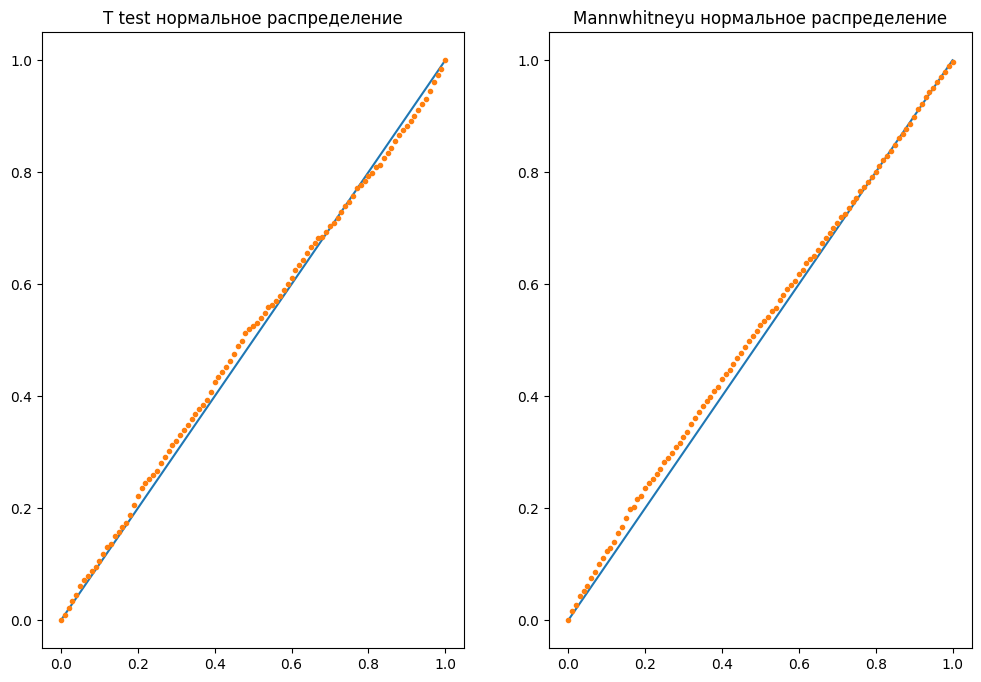

In [85]:
def cor(x, s):
    t, m = [], []
    for _ in range(1000):
        arr1 = x.rvs(loc = 0, scale = 1, size = 100)
        arr2 = x.rvs(loc = 0, scale = 2, size = 100)
        t.append(sps.ttest_ind(arr1, arr2, equal_var=False, alternative = "two-sided").pvalue)
        m.append(sps.mannwhitneyu(arr1, arr2, alternative = "two-sided").pvalue)
    t = np.array(t)
    m = np.array(m)
    a = [0.01 * i for i in range(101)]
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))
    for i, j, k in zip(axes.flat, [t, m], ["T test " + s, "Mannwhitneyu " + s]):
        i.plot(a, a)
        num = [len(j[j < q]) / 1000 for q in a]
        i.plot(a, num, '.')
        i.set_title(k)

cor(sps.norm, "нормальное распределение")

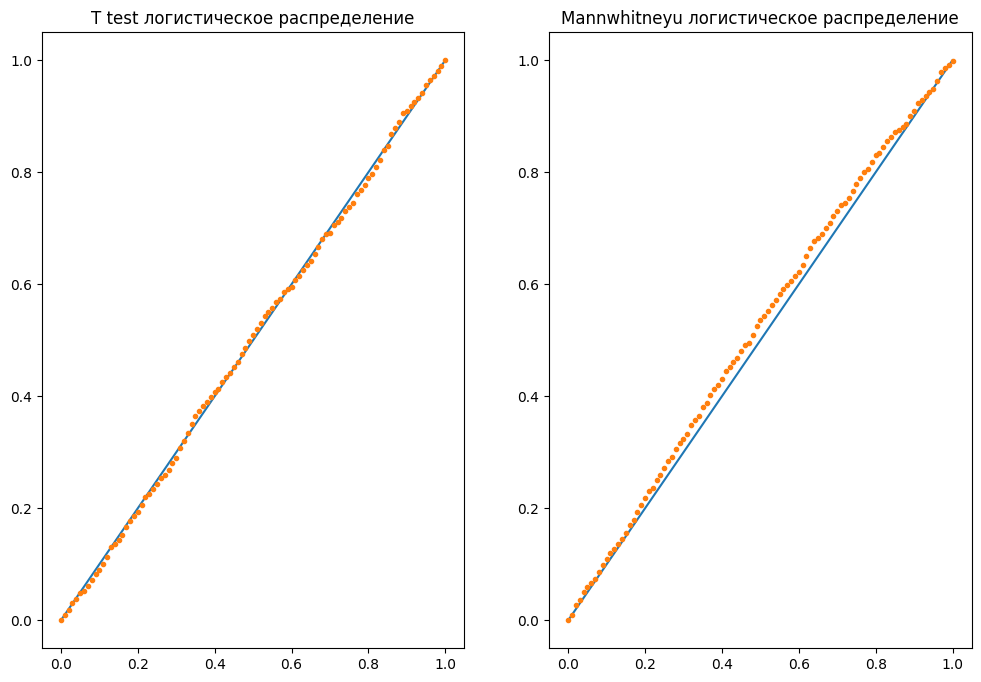

In [87]:
cor(sps.logistic, "логистическое распределение")